훈련 데이터:  (278, 1)
검증 데이터:  (120, 1)
원본 데이터:  (278, 1)
2차항 변환 데이터:  (278, 3)
R^2 결정계수:  0.7255470154177006


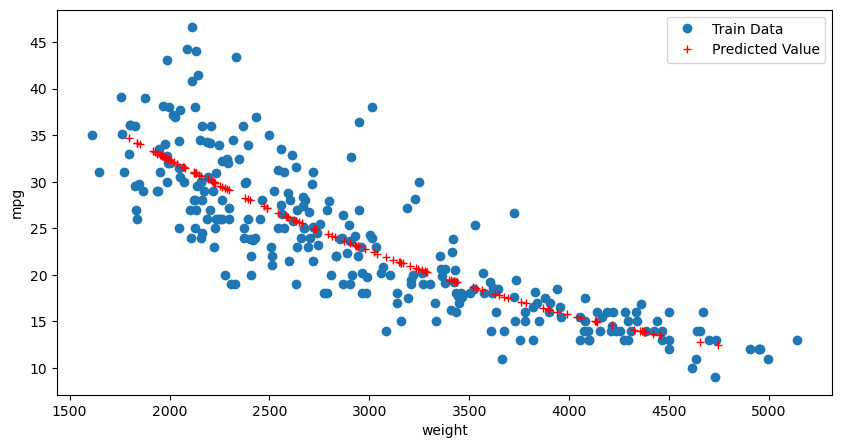

mse:  15.813520500513514
mse:  15.813520500513514
mae:  3.140565073444953


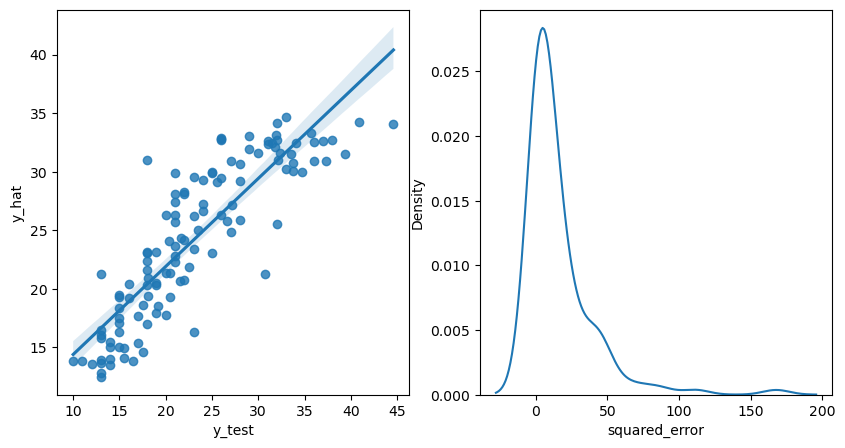

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/auto-mpg.csv', header=None)


df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 


df['horsepower'] = df['horsepower'].replace('?', np.nan)     
df['horsepower'] = df['horsepower'].astype('float')          


df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())               


ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X=ndf[['weight']] 
y=ndf['mpg']     


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print('원본 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape) 

pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
print('R^2 결정계수: ', r_square)

y_hat_test = pr.predict(X_test_poly)

fig, axes = plt.subplots(figsize=(10,5))
axes.plot(X_train,y_train,'o',label='Train Data')         
axes.plot(X_test, y_hat_test, 'r+', label='Predicted Value') 
axes.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

X_ploy = poly.fit_transform(X_test)

test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat_test 
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test'])**2

mse = test_preds['squared_error'].mean()
print('mse: ', mse)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat_test)
print('mse: ', mse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_hat_test)
print('mae: ', mae)

fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.regplot(x='y_test',y='y_hat',data=test_preds,ax=axes[0]);
sns.kdeplot(x='squared_error',data=test_preds, ax=axes[1]);